In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import gradio as gr
from PIL import Image
%matplotlib inline

/home/aleisley/Documents/mengai/ai231/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")

# Train the model on the COCO8 dataset for 100 epochs
model.train(
    data="./data/ObjectDetection/data.yaml",  # Path to dataset configuration file
    epochs=50,  # Number of training epochs
    imgsz=640,  # Image size for training
    device="cuda",  # Device to run on (e.g., 'cpu', 0, [0,1,2,3])
)

# Evaluate the model's performance on the validation set
metrics = model.val()

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.7.1+rocm6.3 CUDA:0 (AMD Radeon Graphics, 16368MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./data/ObjectDetection/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

In [2]:
# Load a pretrained YOLO11n model
model = YOLO(
    "/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.pt")

# Evaluate the model's performance on the validation set
# metrics = model.val()

In [19]:
# Evaluate the model's performance on the validation set
metrics = model.val(plots=True)
cm = metrics.confusion_matrix

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.7.1+rocm6.3 CUDA:0 (AMD Radeon Graphics, 16368MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3476.5±1477.2 MB/s, size: 43.1 KB)
val: Scanning /home/aleisley/Documents/mengai/ai231/machine_exercises/data/ObjectDetection/test/labels.cache... 883 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 883/883 4.2Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 56/56 19.5it/s 2.9s0.1s
                   all        883       2324      0.953       0.96      0.979      0.876
        coffee_nescafe         20        135      0.775      0.822      0.885      0.701
         coffee_kopiko         36        181      0.952      0.868      0.973      0.853
Lucky-Me-Pancit-Canton         25         40      0.994          1      0.995      0.924
           Coke-in-can         25         35      0.985          1      0.995      0.985
           Alaska-Milk         25         69      

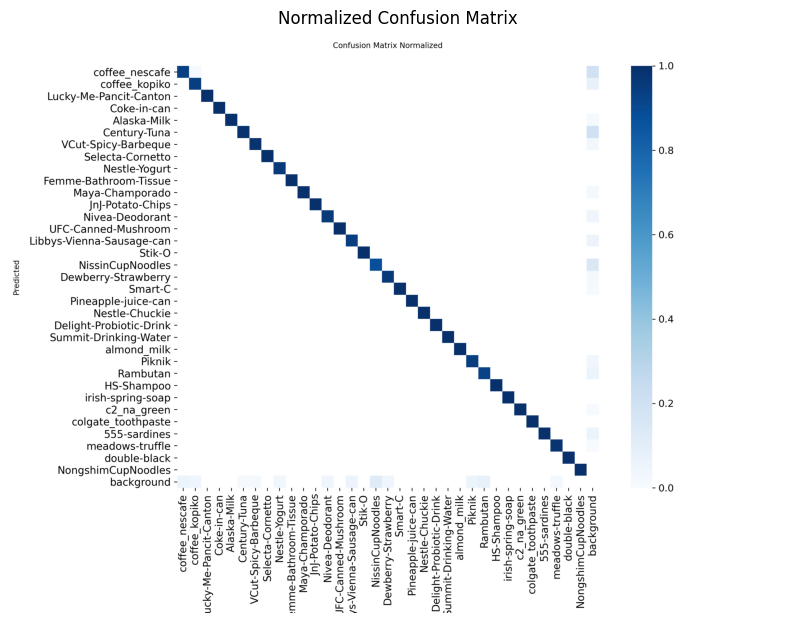

In [27]:
cm_plot_dir = '/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/'

# Save confusion matrix
cm.plot(normalize=True, save_dir=cm_plot_dir)

# Load and display the saved image
img = plt.imread(cm_plot_dir + 'confusion_matrix_normalized.png')
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.title("Normalized Confusion Matrix")
plt.show()


image 1/1 /home/aleisley/Documents/mengai/ai231/machine_exercises/data/ObjectDetection/test/images/555_sardines_tomato_019_test.jpg: 480x640 2 555-sardiness, 6.0ms
Speed: 2.2ms preprocess, 6.0ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


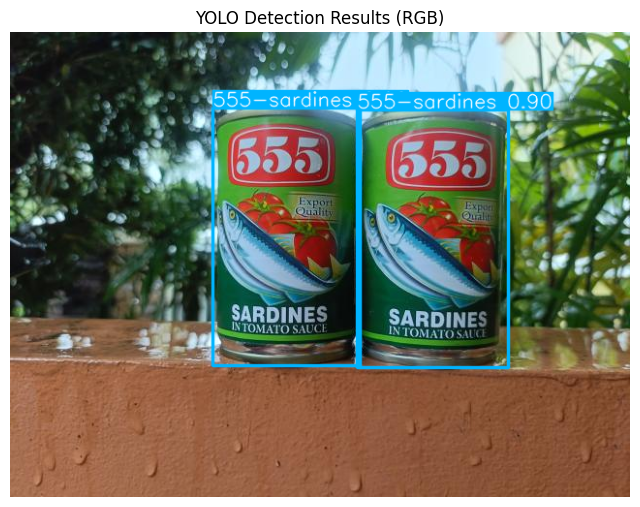

In [ ]:
# Predict on an image
results = model(
    "./data/ObjectDetection/test/images/555_sardines_tomato_019_test.jpg")
annot_bgr = results[0].plot()          # BGR from OpenCV
annot_rgb = annot_bgr[..., ::-1]

plt.figure(figsize=(8, 8))
plt.imshow(annot_rgb)
plt.axis('off')
plt.title("YOLO Detection Results (RGB)")
plt.show()

In [ ]:
# Export the model to ONNX format for deployment
# Returns the path to the exported model
path = model.export(format="onnx", opset=12, dynamic=True, simplify=True)
print(f"Model exported to: {path}")

Ultralytics 8.3.206 🚀 Python-3.12.11 torch-2.7.1+rocm6.3 CPU (AMD Ryzen 7 9800X3D 8-Core Processor)

PyTorch: starting from '/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 38, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.67', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 10.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1rc1 opset 19...
ONNX: slimming with onnxslim 0.1.70...
ONNX: export success ✅ 10.8s, saved as '/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.onnx' (10.1 MB)

Export complete (10.9s)
Results saved to /home/aleisley/Documents/mengai/ai231/runs/detect/train/weights
Predict:         yolo predict task=detect model=/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.onnx imgsz=640  
Va

In [ ]:
import gradio as gr
import numpy as np
from ultralytics import YOLO
from fastrtc import WebRTC  # or Stream

# Load once (PyTorch .pt or ONNX .onnx both work)
model = YOLO(
    "/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.onnx")


css = """.my-group {max-width: 600px !important; max-height: 600px !important;}
         .my-column {display: flex !important; justify-content: center !important; align-items: center !important;}
         footer { display:none !important; }
    """


def predict_image(img, conf_threshold, iou_threshold):
    """Predicts objects in an image using a YOLO11 model with adjustable confidence and IOU thresholds."""
    results = model.predict(
        source=img,
        conf=conf_threshold,
        iou=iou_threshold,
        show_labels=True,
        show_conf=True,
        imgsz=640,
    )

    for r in results:
        im_array = r.plot()
        im = Image.fromarray(im_array[..., ::-1])

    return im


def predict_frame(frame: np.ndarray, conf_threshold: float = 0.7, iou_threshold: float = 0.45) -> np.ndarray:
    """
    frame: RGB uint8 HxWx3 (what WebRTC sends into fn)
    return: RGB uint8 HxWx3 (what WebRTC expects back)
    """
    if frame is None or frame.size == 0:
        return frame

    # Ultralytics accepts numpy images. It’s okay to pass RGB; the library handles it.
    results = model.predict(
        source=frame,
        conf=conf_threshold,
        iou=iou_threshold,
        imgsz=640,
        # device=DEVICE,
        verbose=False,
    )

    # Take first result (single frame)
    r = results[0]
    im_rgb = r.plot(labels=True, conf=True)
    return im_rgb


def image_classifier(inp):
    return {'cat': 0.3, 'dog': 0.7}


with gr.Blocks(css=css) as demo:
    gr.HTML(
        """
        <h1 style='text-align: center'>
        YOLOv10 Webcam Stream (Powered by WebRTC ⚡️)
        </h1>
        """
    )

    with gr.Sidebar(position="left"):
        gr.Markdown("### Settings")
        conf_slider = gr.Slider(0.1, 1.0, value=0.7,
                                step=0.05, label="Confidence")
        iou_slider = gr.Slider(0.1, 1.0, value=0.45, step=0.05, label="IOU")

    with gr.Tab('Upload image'):
        with gr.Row():
            with gr.Column():
                in_img = gr.Image(type="pil", label="Upload Image")
            with gr.Column():
                out_img = gr.Image(type="pil", label="Result")
        run_btn = gr.Button("Run detection")
        run_btn.click(
            fn=predict_image,
            inputs=[in_img, conf_slider, iou_slider],
            outputs=out_img
        )

    with gr.Tab("Live Testing"):
        with gr.Row():
            image = WebRTC(full_screen=False, label="Stream",
                           elem_id="my-video", height=800, width=800)
            image.stream(
                fn=predict_frame,
                inputs=[
                    image,
                    conf_slider,
                    iou_slider
                ],
                outputs=[image],
            )


if __name__ == "__main__":
    demo.launch()

* Running on local URL:  http://127.0.0.1:7873
* To create a public link, set `share=True` in `launch()`.


In [17]:
import gradio as gr
import numpy as np
from ultralytics import YOLO
from fastrtc import WebRTC  # or Stream

# Load once (PyTorch .pt or ONNX .onnx both work)
model = YOLO(
    "/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.onnx")

# If you're on CPU/ROCm and want to force CPU, set device='cpu' below.
# If you have GPU, you can try device=0 (CUDA) or 'cuda:0'.
DEVICE = "cpu"  # change to 0 or 'cuda:0' if available

css = """.my-group {max-width: 600px !important; max-height: 600px !important;}
         .my-column {display: flex !important; justify-content: center !important; align-items: center !important;}
         footer { display:none !important; }
    """


def predict_frame(frame: np.ndarray, conf_threshold: float = 0.7):
    """
    frame: RGB uint8 HxWx3 (what WebRTC sends into fn)
    return: RGB uint8 HxWx3 (what WebRTC expects back)
    """
    if frame is None or frame.size == 0:
        return frame

    # Ultralytics accepts numpy images. It’s okay to pass RGB; the library handles it.
    results = model.predict(
        source=frame,
        conf=conf_threshold,
        iou=0.45,
        imgsz=640,
        # device=DEVICE,
        verbose=False,
    )

    # Take first result (single frame)
    r = results[0]
    im_rgb = r.plot(labels=True, conf=True)
    return im_rgb


with gr.Blocks(css=css) as demo:
    gr.HTML(
        """
        <h1 style='text-align: center'>
        YOLOv10 Webcam Stream (Powered by WebRTC ⚡️)
        </h1>
        """
    )

    with gr.Column(elem_classes=["my-column"]):
        with gr.Group(elem_classes=["my-group"]):
            image = WebRTC(label="Stream")
            conf_threshold = gr.Slider(
                label="Confidence Threshold",
                minimum=0.0,
                maximum=1.0,
                step=0.05,
                value=0.30,
            )

        image.stream(
            fn=predict_frame,
            inputs=[
                image, conf_threshold],
            outputs=[image],
        )

demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7876
* Running on public URL: https://09597abf38912bef8c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
import numpy as np
from ultralytics import YOLO
from fastrtc import WebRTC  # or Stream

# Load once (PyTorch .pt or ONNX .onnx both work)
model = YOLO(
    "/home/aleisley/Documents/mengai/ai231/runs/detect/train/weights/best.onnx")

# If you're on CPU/ROCm and want to force CPU, set device='cpu' below.
# If you have GPU, you can try device=0 (CUDA) or 'cuda:0'.
DEVICE = "cpu"  # change to 0 or 'cuda:0' if available

css = """
        body: {max-width: 600px; max-height: 600px;}
        .my-group {max-width: 600px !important; max-height: 600px !important;}
         .my-column {display: flex !important; justify-content: center !important; align-items: center !important;}
         footer { display:none !important; }
         #my-video max-width: 300px; max-height: 300px; width: 300px; height: 300px;
    """


def predict_frame(frame: np.ndarray, conf_threshold: float = 0.7):
    """
    frame: RGB uint8 HxWx3 (what WebRTC sends into fn)
    return: RGB uint8 HxWx3 (what WebRTC expects back)
    """
    if frame is None or frame.size == 0:
        return frame

    # Ultralytics accepts numpy images. It’s okay to pass RGB; the library handles it.
    results = model.predict(
        source=frame,
        conf=conf_threshold,
        iou=0.45,
        imgsz=640,
        # device=DEVICE,
        verbose=False,
    )

    # Take first result (single frame)
    r = results[0]
    im_rgb = r.plot(labels=True, conf=True)
    return im_rgb


with gr.Blocks(css=css) as demo:
    with gr.Row():
        gr.HTML(
            """
            <h1 style='text-align: center'>
            YOLOv10 Webcam Stream (Powered by WebRTC ⚡️)
            </h1>
            """
        )

    with gr.Row():
        conf_threshold = gr.Slider(
            label="Confidence Threshold",
            minimum=0.0,
            maximum=1.0,
            step=0.05,
            value=0.30,
        )
    with gr.Row():
        image = WebRTC(full_screen=False, label="Stream", elem_id="my-video")
        image.stream(
            fn=predict_frame,
            inputs=[
                image, conf_threshold],
            outputs=[image],
        )

    # with gr.Column(elem_classes=["my-column"]):
    #     with gr.Group(elem_classes=["my-group"]):
    #         image = WebRTC(label="Stream")
    #         conf_threshold = gr.Slider(
    #             label="Confidence Threshold",
    #             minimum=0.0,
    #             maximum=1.0,
    #             step=0.05,
    #             value=0.30,
    #         )

    #     image.stream(
    #         fn=predict_frame,
    #         inputs=[
    #             image, conf_threshold],
    #         outputs=[image],
    #     )


demo.launch()

* Running on local URL:  http://127.0.0.1:7892
* To create a public link, set `share=True` in `launch()`.


In [67]:
import torch
print("HIP:", torch.version.hip)          # e.g. '6.1'
print("ROCm:", torch.version.rocm)        # sometimes None in older builds
print(torch.cuda.is_available())          # should be True on ROCm
print(torch.cuda.get_device_name(0))

HIP: 6.3.42131-fa1d09cbd


AttributeError: module 'torch.version' has no attribute 'rocm'

In [71]:
import onnxruntime as ort
print(ort.__version__)
print(ort.get_available_providers())

1.23.0
['TensorrtExecutionProvider', 'CUDAExecutionProvider', 'CPUExecutionProvider']


In [1]:
import cv2